# Twitter scraping --> dataFrame transition 

In [38]:
# import tweepy 

# # Set up authentication keys
# api_key = "ItbKNccnIwwKsG1nWpUQ6BW0s"
# api_sec = "GZMDSNgPlyBwH6QM3UIulq6drNPhUuYBEk0xaIDYhSimWdm1hh"

# # from proxy server we need to connect
# access_token = "2752151121-1KcoP15kG7M5meIVHe16EpXKNLTXxcxDN0q6mgV"
# access_token_sec = "SQVTqXHSt1bazOdBn8SOMV4LSxtF3IwyDYmB78leMgik5"

# # Authenticate with Twitter API
# auth = tweepy.OAuthHandler(api_key, api_sec)
# auth.set_access_token(access_token, access_token_sec)

# # Connect to Twitter API
# api_connect = tweepy.API(auth)
# api_connect

In [39]:
# # 
# tag_tweet = ["Artificial Intelligence",'Machine Learning','Deep Learning','Neural Networks','Natural Language Processing','Computer Vision','Robotics','Data Science','Reinforcement Learning',"AI Ethics"]
# dictt = []
# for i in range(0,10):
#     tweet_data=api_connect.search_tweets(tag_tweet[i],count=500, lang='en')
#     dictt.append([i.text for i in tweet_data])

# print(len(dictt))

In [40]:
# Tweets= [j for i in dictt for j in i]

# import pandas as pd

# Tweets = {"Tweets": list(set(Tweets))}
# df = pd.DataFrame(Tweets)

# #df["Tweets"].isin(["NaN","None",'N/A',""]).sum()

# df.to_csv("Raw_twitter_data.csv")
# df

# Another method i.e. reading files from a folder 

In [42]:
# import pandas as pd
# import sklearn.datasets as skds

# # Source file directory
# path_train = r'D:\dataset\BBC News Summary\News Articles'

# files_train = skds.load_files(path_train, load_content=False)    # returns dictionary like objects of filenames and target variables 

# label_index = files_train.target   #returns classes of array that the files belongs

# label_names = files_train.target_names   # returns names of classes

# labelled_files = files_train.filenames    # returns all the name of files that of all classes
# labelled_files
# data_tags = ["filename", "category", "news"]


# data_list = []
# #Read and add data from files to a list
# for i, f in enumerate(labelled_files):
#     try:
#         with open(f, 'r') as file:
#             data_list.append((f, label_names[label_index[i]], file.read()))
#     except:
#         pass

# #Create a DataFrame from the data list
# df = pd.DataFrame(data_list, columns=data_tags)
# print(set(df["category"]))
# df


# Another method i.e. by upload dataset directly

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\bikra\Downloads\archive\IMDB Dataset.csv")  
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
df.columns

Index(['review', 'sentiment'], dtype='object')

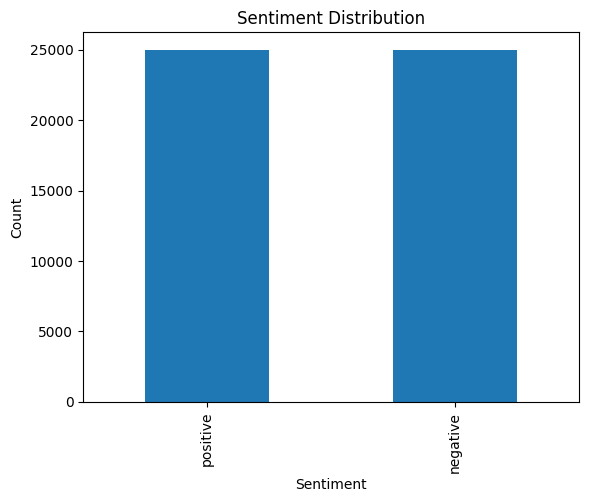

In [3]:
import matplotlib.pyplot as plt

# Count the number of instances of each sentiment value
counts = df['sentiment'].value_counts()

# Plot a bar chart
counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the chart
plt.show()

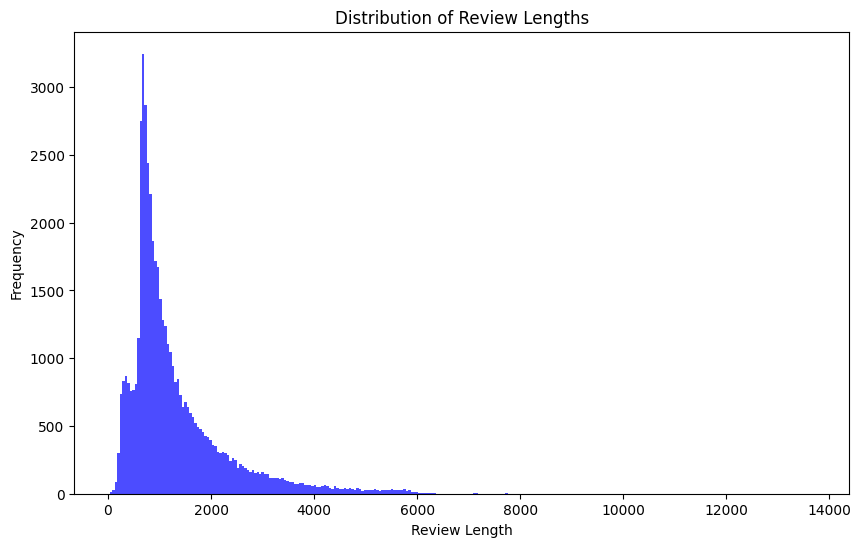

In [4]:
import matplotlib.pyplot as plt
# Compute the length of each review in the column
review_lengths = df['review'].apply(len)

# Plot a histogram of review lengths
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(review_lengths, bins='auto', color='blue', alpha=0.7)

# Set the chart title and axis labels
ax.set_title('Distribution of Review Lengths')
ax.set_xlabel('Review Length')
ax.set_ylabel('Frequency')

# Show the chart
plt.show()

# Data Preprocessing or cleanning


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
import string 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def normalize_text(text):
    # Converting any data into string
    text = re.sub(r'[^a-zA-Z0-9.\s]', '', str(text))
    
    # Remove HTML entities
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove mentions
    text = re.sub('@[^\s]+', '', text)
    
    # Remove currency symbols
    text = re.sub(r'\$\w*', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Remove URLs
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    
    # Remove punctuation except '@'
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 1 or 2 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove leading spaces
    text = text.lstrip(' ')
    
    # Remove non-BMP characters
    text = ''.join(c for c in text if c <= '\uFFFF')
    
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Remove punctuation
    no_punc = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    lower = no_punc.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(lower)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    no_stop_words = [word for word in tokens if word not in stop_words]

    # Stem the words
    stemmed = [stemmer.stem(word) for word in no_stop_words]

    # Lemmatize the words
    lemmed = [lemmatizer.lemmatize(word) for word in stemmed]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmed)
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bikra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bikra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df['Reviews']= df['review'].apply(normalize_text)

# Reviews= [ ]
# for i in df["Reviews"]:
#     if len(i)>50:
#         Reviews.append(i)

df = pd.DataFrame({"Reviews":df["Reviews"], "Sentiments":df["sentiment"]} )

#This dataset specifically contains float datas so we need to remove it or replace
#df.loc[df["Tweets"].apply(lambda x: isinstance(x, float)), "Tweets"] = ""

df.to_csv("cleaned_twitter_data.csv")
df

,Reviews,Sentiments
0,one review mention watch episod youll hook rig...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,go disagre previou comment side maltin one sec...,negative


In [7]:
df.duplicated().sum()

425

In [8]:
df.drop_duplicates()

,Reviews,Sentiments
0,one review mention watch episod youll hook rig...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,go disagre previou comment side maltin one sec...,negative


# Tweets analyzation using TextBlob ("Labeling")

In [9]:
# # Counting 
# from textblob import TextBlob
# from collections import Counter

# df[['Polarity', 'Subjectivity']] = df['Tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# df.to_csv("cleaned_twitter_data.csv")

# # # Count positive, negative, and neutral tweets
# # sentiment_counts = Counter('positive' if a > 0 else 'negative' if a < 0 else 'neutral' for a in df['Polarity'])

# # numberOfTweetsAnalysed = sum(sentiment_counts.values())
# # positive = sentiment_counts['positive']
# # negative = sentiment_counts['negative']
# # neutral = sentiment_counts['neutral']

# # print(f'Number of Tweets Analysed = {numberOfTweetsAnalysed}')
# # print(f'Positive tweets = {positive}')
# # print(f'Negative tweets = {negative}')
# # print(f'Neutral tweets = {neutral}')

# #Labeling 
# import csv

# final_data = []
# with open("cleaned_twitter_data.csv", 'r',encoding="utf-8") as file:
#     reader = csv.DictReader(file)
#     for row in reader:
#         try:
#             if float(row['Polarity']) > 0:
#                 row['labels'] = "Positive"
#             elif float(row['Polarity']) == 0:
#                 row['labels'] = "Neutral"
#             else:
#                 row['labels'] = "Negative"
#             final_data.append(row)
#         except ValueError:
#             pass
        
# final_data    #This is the list of dictionary of each row 

# df = pd.DataFrame(final_data)
# df.to_csv("cleaned_twitter_data.csv")

# df = pd.read_csv("cleaned_twitter_data.csv",usecols=['Tweets','Polarity','Subjectivity','labels'])

# df

# Identifying Vocab size for the Neural Network

In [10]:
from typing import List, Tuple
import pandas as pd

# df = pd.read_csv("cleaned_twitter_data.csv")

def create_vocabulary(sentences: List[str]) -> Tuple[dict, dict, int]:
    """
    Creates a vocabulary of unique words from a list of sentences and returns the word-to-index and index-to-word mappings
    as well as the size of the vocabulary.
    
    Args:
    sentences: A list of strings representing the input sentences.
    
    Returns:
    A tuple containing the word-to-index and index-to-word mappings as dictionaries, as well as the size of the vocabulary.
    """
    word_to_indx = {}
    indx_to_word = {}
    indx_count = 1
    
    for sent in sentences:
        for word in sent.split():
            if word not in word_to_indx:
                word_to_indx[word] = indx_count
                indx_to_word[indx_count] = word
                indx_count += 1
    
    vocab_size = len(word_to_indx) + 1
    
    return word_to_indx, indx_to_word, vocab_size

# Example usage
sentences = df["Reviews"]
word_to_indx, indx_to_word, vocab_size = create_vocabulary(sentences)

print("word_to_indx:", word_to_indx)
print("indx_to_word:", indx_to_word)
print(vocab_size)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
#get tweet length 
import matplotlib.pyplot as plt 
import seaborn as sns
df["len"] = df["Reviews"].apply(lambda words: len(words))
# plt.figure(figsize=(15,15))
# sns.countplot(data=df, x="len")
df.describe()

,len
count,50000.000000
mean,729.352180
std,561.111228
min,17.000000
25%,383.000000
50%,538.000000
75%,887.250000
max,8303.000000


# Converting each word in the tweets to its corresponding index, pads or truncates the sequences to a fixed length of input_size.

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # set input size to 50
input_size = 100

df["Reviews_indexes"] = df["Reviews"].apply(lambda words: [word_to_indx[word] for word in words.split()])
fixed_size_input = pad_sequences(df["Reviews_indexes"], maxlen=input_size ,dtype="object", padding="post", truncating="post")

fixed_size_input   # dytpe ---> OBJECT 

import numpy as np
#converting the fixed_size_input into float--> dtype float32
fixed_size_input = fixed_size_input.astype(np.float32)
fixed_size_input[1]


array([136., 137., 138., 139., 140., 141., 142., 143., 144., 129., 145.,
       146., 147., 148., 149., 150., 151., 152., 117., 153., 154., 155.,
       103., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 117., 168.,   4., 169., 170., 171., 150., 172., 138.,
         1., 173., 172., 174., 175., 148., 176., 177.,  56., 137.,  12.,
       178., 109., 179.,  32., 180., 181., 140., 182., 183., 184., 185.,
       186., 147., 187.,  16., 188., 189., 190.,  18., 187., 191., 190.,
       192., 193., 194., 195., 196., 117., 197.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.], dtype=float32)

# labels into numpy array

In [13]:
#create output variable
n_labels = pd.get_dummies(df["Sentiments"],drop_first=False).values
n_labels = n_labels.astype(np.float32)
n_labels[0]

array([0., 1.], dtype=float32)

# Splitting dataset

In [14]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(fixed_size_input, n_labels, test_size=0.2)

# Create model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=input_size, trainable=False)) # Use pre-trained embeddings
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
optimizer = Adam() # Use Adam optimizer with default learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping, checkpoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          11388700  
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11422718 (43.57 MB)
Trainable params: 34018 (132.88 KB)
Non-trainable params: 11388700 (43.44 MB)
_________________________________________________________________
Epoch 1/50

C:\Users\bikra\.conda\envs\qwe\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1000/1000 [==============================] - 43s 41ms/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6930 - val_accuracy: 0.5061
Epoch 2/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5092
Epoch 2: val_accuracy improved from 0.50612 to 0.51412, saving model to best_model.h5
1000/1000 [==============================] - 43s 43ms/step - loss: 0.6928 - accuracy: 0.5092 - val_loss: 0.6918 - val_accuracy: 0.5141
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5289
Epoch 3: val_accuracy improved from 0.51412 to 0.51825, saving model to best_model.h5
1000/1000 [==============================] - 49s 49ms/step - loss: 0.6893 - accuracy: 0.5289 - val_loss: 0.6900 - val_accuracy: 0.5182
Epoch 4/50
 999/1000 [============================>.] - ETA: 0s - loss: 0.6569 - accuracy: 0.6074
Epoch 4: val_accuracy improved from 0.51825 to 0.66825, saving model to best_model.h5
1000/1000 [==============================] 

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3871 - accuracy: 0.8255
Test loss: 0.3870842158794403
Test accuracy: 0.8255000114440918


In [20]:
# from sklearn.metrics import confusion_matrix, classification_report

# # Get predicted labels for test set
# y_pred = model.predict(X_test)

# # Convert predicted labels from probabilities to class labels
# y_pred = np.argmax(y_pred, axis=1)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

# # Calculate evaluation metrics
# report = classification_report(y_test, y_pred)

# # Print evaluation metrics
# print("Classification Report:")
# print(report)

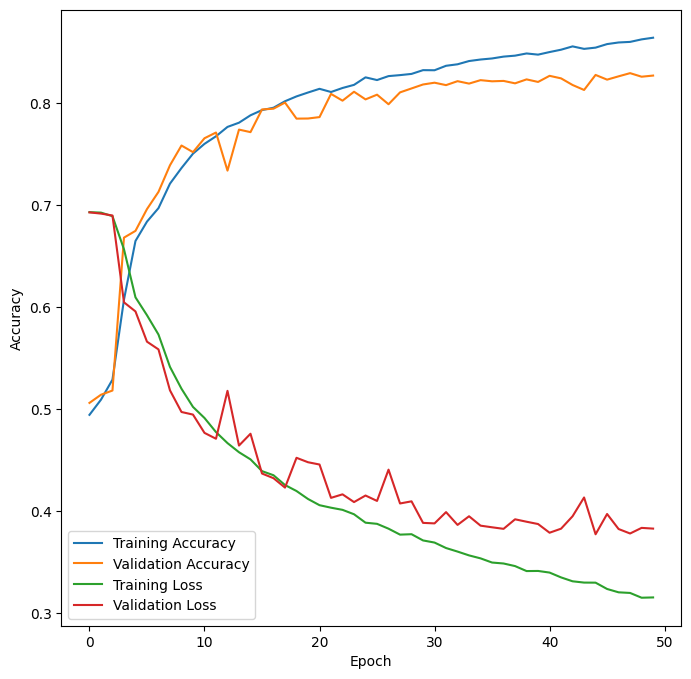

In [17]:
import matplotlib.pyplot as plt

# assuming you have four lists of accuracy and loss values
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

# create a figure with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

ax1.plot(accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc="lower left")

# show the plot
plt.show()

# Sentiment Analysis using RandomForest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # assuming you have a dataset of text data and sentiment labels
# data = df["Tweets"]
# labels = df["labels"]

# # convert the text data into numerical features using CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data)

# # split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# # train the Random Forest classifier on the training set
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# # make predictions on the testing set
# y_pred = clf.predict(X_test)

# # evaluate the performance of the classifier using accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)


# Using Support Vector Machine 

In [ ]:
# from sklearn.svm import SVC
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # assuming you have a dataset of text data and sentiment labels
# data = df["Tweets"]
# labels = df["labels"]

# # convert the text data into numerical features using CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data)

# # split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# # train the SVM classifier on the training set
# clf = SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # make predictions on the testing set
# y_pred = clf.predict(X_test)

# # evaluate the performance of the classifier using accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

# Using Naive Bayes


In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # assuming you have a dataset of text data and sentiment labels
# data = df["Tweets"]
# labels = df["labels"]

# # convert the text data into numerical features using CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data)

# # split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# # train the Naive Bayes classifier on the training set
# clf = MultinomialNB()
# algo = clf.fit(X_train, y_train)

# # make predictions on the testing set
# y_pred = algo.predict(X_test)

# # evaluate the performance of the classifier using accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)

In [ ]:
# # predict the sentiment of a new text
# new_text = df["Tweets"][4]
# new_text_features = vectorizer.transform([new_text])
# predicted_sentiment = clf.predict(new_text_features)

# print('Predicted sentiment:', predicted_sentiment)